In [1]:
import numpy as np

In [2]:
data = np.loadtxt("/Users/nikita/Documents/Phyton/MSAD/LR-1/var4.txt")
data.shape[0]

500

In [3]:
from matplotlib import pyplot as plt   

# импортируем пакет pyplot из библиотеки matholib (пакет для создания графиков)

# Основные задания (на 4 балла) 

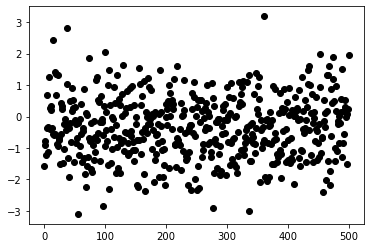

In [4]:
plt.scatter(range(0, data.shape[0]), data, c = 'black')      # график разброса
plt.show()

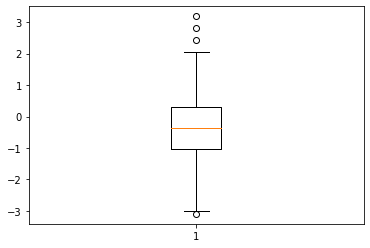

In [5]:
plt.boxplot(data)         # ящик с усами
plt.show()

 желтая линия внутри прямоугольника - медиана. Линия лежит в середине «ящика»  ->  
 -> распределение выборки примерно симметричное. 
 Нижняя и верхняя граница «ящика» соответствуют нижнему и верхнему квартилю (Q1 и Q3)
 Точки сверху и снизу "антенн" - выбросы на графике 

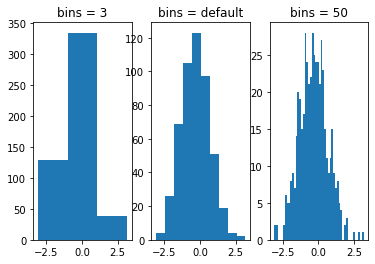

In [6]:
plt.subplot(1, 3, 1)
plt.hist(data, bins = 3)      # построение гистограммы

plt.title("bins = 3")
plt.subplot(1, 3, 2)

plt.title("bins = default")
plt.hist(data)
plt.subplot(1, 3, 3)

plt.title("bins = 50")
plt.hist(data, 50)
plt.show()

In [8]:
# 1 график - имеет недостаточную точность
# 2 график - все ОК
# 3 график - имеет провалы

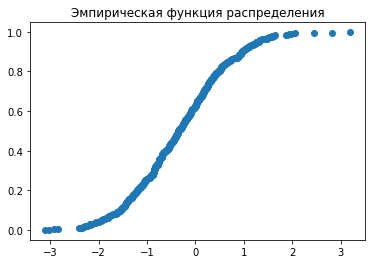

In [24]:
sorted_data = data.copy()
sorted_data.sort()
plt.scatter(sorted_data, np.array(range(0, data.shape[0])) / data.shape[0])
plt.title("Эмпирическая функция распределения")
plt.show()

# Можно сделать предположение, что СВ принадлежит к N(0,1) распределению

In [25]:
from scipy.stats import skew
from scipy.stats import kurtosis as kurtosis_

# Нахождение среднего
mean = data.mean()
print("Среднее =", mean)


# Стандартное отклонение
std = data.std()
print("Стандартное отклонение =", std)


# Дисперсия 
disp = data.var()
print("Дисперсия =", disp)


# Медиана
median = np.median(data)
print("Медиана =", median)


# 1 квартиль
quan1 = np.quantile(data, 0.25)
print("1 квартиль =", quan1)


# 3 квартиль
quan3 = np.quantile(data, 0.75)
print("3 квартиль =", quan3)


# Коэффициент асимметрии
skewness = skew(data)
print("Коэффициент асимметрии =", skewness)


# Коэффициент эксцесса
kurtosis = kurtosis_(data)
print("Коэффициент эксцесса =", kurtosis)


# Минимальное значение выборки
minvalue = data.min()
print("Минимальное значение выборки =", minvalue)


# Максимальное значение выборки
maxvalue = data.max()
print("Максимальное значение выборки =", maxvalue)

Среднее = -0.335303330804
Стандартное отклонение = 0.9835038950153362
Дисперсия = 0.9672799115103375
Медиана = -0.34940265000000004
1 квартиль = -1.0323835
3 квартиль = 0.29524585
Коэффициент асимметрии = 0.1198744546112653
Коэффициент эксцесса = 0.0496418854169991
Минимальное значение выборки = -3.096526
Максимальное значение выборки = 3.189322


# Бонусные задания

In [26]:
# Проверка правила 3 сигма 
# Правило 3 сигма - правило, утверждающее, что вероятность того, что случайная величина отклонится от 
# своего математического ожидания более чем на три среднеквадратических отклонения, практически равна нулю.

# https://wiki.loginom.ru/articles/3-sigma-rule.html

count = data[np.logical_and(data >= mean - 3 * std, data <= mean + 3 * std)].shape[0]
print("Элементов в 3σ области =", count)
print("% :", (count / data.shape[0]) * 100)

Элементов в 3σ области = 498
% : 99.6


In [27]:
# Все ОК

In [28]:
import scipy.stats as sci

In [29]:
# Подгонка закона распределения

def bind_mean_std(func, mean, std):
    def norm_density(x):
        return func(x, mean, std)
    return norm_density

In [30]:
# kstest - одно- или двухвыборочный тест Колмогорова-Смирнова на соответствие. Тест с одной выборкой сравнивает 
# базовое распределение F (x) выборки с заданным распределением G (x). Тест с двумя выборками сравнивает 
# базовые распределения двух независимых выборок. Оба теста действительны только для непрерывных распределений.



_, p_ks_norm = sci.kstest(data, bind_mean_std(sci.norm.cdf, mean, std))
_, p_ks_laplace = sci.kstest(data, bind_mean_std(sci.laplace.cdf, mean, std))
_, p_normaltest = sci.normaltest(data)
_, p_shapiro = sci.shapiro(data)
print(f"p-value КС тест = {p_ks_norm}")
print(f"p-value of распределение Лаплпса = {p_ks_laplace}")
print(f"p-value of normaltest builtin function = {p_normaltest}")
print(f"p-value Шапиро тест = {p_shapiro}")

# Критерий Шапиро используется для проверки гипотезы H_0: «случайная величина X распределена нормально» и 
# является одним наиболее эффективных критериев проверки нормальности. Критерии, проверяющие нормальность выборки, 
# являются частным случаем критериев согласия. Если выборка нормальна, можно далее применять мощные параметрические 
# критерии, например, критерий Фишера.


p-value КС тест = 0.9784156613345183
p-value of распределение Лаплпса = 0.10517747401831112
p-value of normaltest builtin function = 0.5036392378389766
p-value Шапиро тест = 0.6910320520401001


Скорее всего, это нормальное распределение

# Работа с пропусками

In [83]:
import random

data_w_skips = data.copy()
count_skips = int((0.2 + np.random.rand() * 0.3) * data.shape[0])
data_w_skips = np.delete(data_w_skips, random.sample(range(0, data.shape[0]), count_skips))
print(f"Selection with skips: { sci.describe(data_w_skips)}")
print(f"Default selection: { sci.describe(data)}")

# Заметны некоторые различия, которые связаны с тем, что доля пропусков достаточно велика а объем выборки 
# не очень большой. Тем не менее, различие в МО и дисперсиях достаточно малы

Selection with skips: DescribeResult(nobs=255, minmax=(-2.916559, 2.447778), mean=-0.28239046510588234, variance=0.8926399349674026, skewness=0.07613343034983382, kurtosis=-0.1969373236043359)
Default selection: DescribeResult(nobs=500, minmax=(-3.096526, 3.189322), mean=-0.335303330804, variance=0.9692183482067511, skewness=0.1198744546112653, kurtosis=0.0496418854169991)


Заметны некоторые различия, которые связаны с тем, что доля пропусков достаточно велика а объем выборки 
не очень большой. Тем не менее, различие в МО и дисперсиях достаточно малы

In [85]:
filled_mean = np.full(data.shape, data_w_skips.mean())
for i, v in np.ndenumerate(data_w_skips):
    filled_mean[i] = v
print(f"Selection with skips filled with mean: { sci.describe(filled_mean)}\n")
print(f"Selection with skips: { sci.describe(data_w_skips)}\n")
print(f"default selection: { sci.describe(data)}\n")

Selection with skips filled with mean: DescribeResult(nobs=500, minmax=(-2.916559, 2.447778), mean=-0.28239046510588234, variance=0.4543698266166739, skewness=0.10660812624760582, kurtosis=2.4962013262660063)

Selection with skips: DescribeResult(nobs=255, minmax=(-2.916559, 2.447778), mean=-0.28239046510588234, variance=0.8926399349674026, skewness=0.07613343034983382, kurtosis=-0.1969373236043359)

default selection: DescribeResult(nobs=500, minmax=(-3.096526, 3.189322), mean=-0.335303330804, variance=0.9692183482067511, skewness=0.1198744546112653, kurtosis=0.0496418854169991)



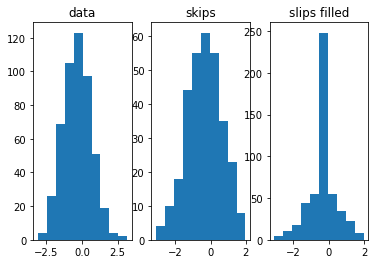

In [33]:
plt.subplot(1, 3, 1)
plt.hist(data)
plt.title("data")
plt.subplot(1, 3, 2)
plt.title("skips")
plt.hist(data_w_skips)
plt.subplot(1, 3, 3)
plt.title("slips filled")
plt.hist(filled_mean)
plt.show()

In [78]:
filled_special = np.array([data_w_skips.mean() + (-1)**i * data_w_skips.std() for i in range(data.shape[0])])
for i, v in np.ndenumerate(data_w_skips):
    filled_special[i] = v
print(f"Selection with skips filled with mean +- std: { sci.describe(filled_special)}\n")
print(f"Selection with skips: { sci.describe(data_w_skips)}\n")
print(f"default selection: { sci.describe(data)}\n")

Selection with skips filled with mean +- std: DescribeResult(nobs=500, minmax=(-3.012445, 3.189322), mean=-0.3205837259384844, variance=0.906181437171818, skewness=0.12508836083859645, kurtosis=-0.6101508524794439)

Selection with skips: DescribeResult(nobs=309, minmax=(-3.012445, 3.189322), mean=-0.31868175570550156, variance=0.90730896676158, skewness=0.19593467040320697, kurtosis=0.2473354818821023)

default selection: DescribeResult(nobs=500, minmax=(-3.096526, 3.189322), mean=-0.335303330804, variance=0.9692183482067511, skewness=0.1198744546112653, kurtosis=0.0496418854169991)



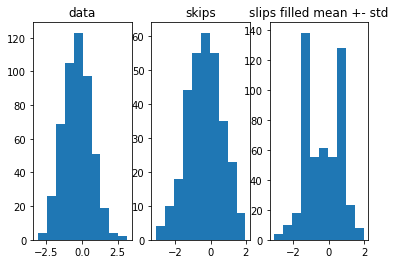

In [35]:
plt.subplot(1, 3, 1)
plt.hist(data)
plt.title("data")
plt.subplot(1, 3, 2)
plt.title("skips")
plt.hist(data_w_skips)
plt.subplot(1, 3, 3)
plt.title("slips filled mean +- std")
plt.hist(filled_special)
plt.show()
